

# Archives Unleashed Hackfest
## November, 30, 2021

![AU HF Poster](AU_Hackfest.png)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BrockDSL/ARCH_Data_Explore/blob/main/Hackfest_Kickoff.ipynb)

The goal of this session is to share the Archives Unleashed dataset and some preliminary findings in hope of igniting some ideas.

- The [Project](https://brockdsl.github.io/archives_unleashed/)
- The [Dataset](https://brockdsl.github.io/archives_unleashed/posts/the-dataset/)
- The [Research Questions](https://brockdsl.github.io/archives_unleashed/posts/crisis-communication-theory/)



## Help

[Kitchen Sink Notebook](https://github.com/archivesunleashed/notebooks/blob/main/arch/arch_example.ipynb) - example jobs you can do with the dataset

[Victoria's Notebooks](https://github.com/vd19qe/web_archive_sentiments) & [part 2](https://github.com/vd19qe/metadata_sentiments)- Our wonderful RA Victoria has done some explanatory work with analysis

In [1]:
#Helper Library
%pip install gdown

#Load up required Libraries

import pandas as pd
import random
import gdown

import matplotlib.pyplot as plt
%matplotlib inline

#Set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', False)
pd.set_option('display.max_rows', 200)






Note: you may need to restart the kernel to use updated packages.


The following notebook will demonstrate the basics of how to load up some of the extracted derviatives of the dataset from the [Archives Research Compute Hub](https://support.archive-it.org/hc/en-us/articles/360061122492-Introduction-to-the-Archive-It-Research-Services-Cloud) platform.  The **derivatives** that can be generated by ARCH classified in the following categories.


### Collection

- **Domain Frequency** with the columns domain and count

### Network

- **Extract Domain Graph**
- **Extract Image Graph**
- **Extract Web Graph**


### Text

- **Extract plain text of webpages**

### File Formats

- *List of lots of extracted file types*


This demo will focus on *Extracted plain text of webpages* last ran on **October 15, 2021**

Two versions:
- sample - only 75000 lines long (about 10% of total dataset)
- full - This file is 500MB! Best be patient with the download


## Sample Dataset

In [ ]:
# SAMPLE Dataset Download

gdown.download('https://drive.google.com/u/0/uc?id=1PDIJUoIwrQNEVIfa2NhVhPvhryY3JUPx&export=download','web-pages_sample.csv.gz',quiet=False)
!gunzip -k web-pages_sample.csv.gz

In [2]:
# SAMPLE Dataset to DF
extracted_text = pd.read_csv("web-pages_sample.csv")

## Full Dataset

In [ ]:
# FULL Dataset Download
# Please be patient!

gdown.download('https://drive.google.com/u/0/uc?id=1cvmEiTgbHcdUEOY1oY8bQUHyz-U3HPfV&export=download','web-pages_full.csv.gz',quiet=False)
!gunzip -k web-pages_full.csv.gz


In [ ]:
# FULL Dataset to DF
extracted_text = pd.read_csv("web-pages_full.csv")

In [ ]:
#Optional
#Creates new sample dataset
#extracted_text.sample(75000).to_csv("web-pages_sample.csv",index=False)

## ... Continue with this next cell...

In [3]:
#Clean up some columns
extracted_text['crawl_date']= pd.to_datetime(extracted_text['crawl_date'],format='%Y%m%d')

In [4]:
#Drop pages that weren't captured
extracted_text = extracted_text[extracted_text['language'] =='en']

## Calculate some more columns

In [5]:
#Length of text
for index, row in extracted_text.iterrows():
    extracted_text.at[index,'length'] = int(len(row['content']))

In [6]:
#5 Random Entries
extracted_text.sample(5)

crawl_date              domain  \
30323 2021-06-13  discover.brocku.ca   
26204 2020-07-17  thehopecentre.net    
48526 2020-07-31  uk.wallapop.com      
72520 2020-09-07  youtube.com          
7215  2021-03-28  discover.brocku.ca   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   url  \
30323  https://discover.brocku.ca/event-registration/?regevent_action=register&event_id=726                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
26204  https://www.thehopecentre.net/covid-19/oj95_hVoJGneIjiOgSCOV_yfS7CDUr5C0kYaNbc22O4.eyJpbnN0YW5jZUlkIjoiYjEzNDgyZmQtZmY5Ni00OWIwLTk1ZWQtMTQ4YmQxNTBjNzg4IiwiYXBwRGVmSWQiOiIxNDI3MWQ2Zi1iYTYyLWQwNDUtNTQ5Yi1hYjk3MmFlMWY3MGUiLCJtZXRhU2l0ZUlkIjoiYzNmMzlmZmEtYmM0YS00ZjY2LTgwM2MtNzkzMjk1YTRmNTAxIiwic2lnbkRhdGUiOiIyMDIwLTA3LTE3VDE5OjI5OjMxLjU1MVoiLCJkZW1vTW9kZSI6ZmFsc2UsImFpZCI6IjBkY2JjZWFiLWFlZGMtNGZjYS1iOTJlLTljMTI2ODM3OThjZiIsImJpVG9rZW4iOiI3MmM3MWQwNy00M2RjLTA2ZDYtMTVkMS02ZGI5NDRmNDMyODkiLCJzaXRlT3duZXJJZCI6ImJiM2ZiOGIyLTJhNDEtNDYyOC1iMmYyLTRmNzE4NTc1ZDg2YSJ9   
48526  https://uk.wallapop.com/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
72520  https://www.youtube.com/embed/kzrYsDPLzEc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
7215   https://discover.brocku.ca/event-registration/?regevent_action=register&event_id=4819                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

      mime_type_web_server mime_type_tika language  \
30323  text/html            text/html      en        
26204  text/html            text/html      en        
48526  text/html            text/html      en        
72520  text/html            text/html      en        
7215   text/html            text/html      en        

                   

## Domain Analysis and Leads

In [7]:
#Domains in dataset
extracted_text['domain'].value_counts()[0:50]

discover.brocku.ca              19455
gncc.ca                         4403 
youtube.com                     4095 
twitter.com                     3043 
portcolborne.ca                 2502 
gobadgers.ca                    1769 
niagaraanglican.ca              1659 
niagarahealth.on.ca             1258 
stcatharinesstandard.ca         1161 
pelhamlibrary.on.ca             1075 
notl.com                        1018 
niagararegion.ca                995  
exhibits.library.brocku.ca      932  
thehopecentre.net               830  
accounts.google.com             746  
brocku.ca                       730  
niagarafallsreview.ca           688  
pinterest.com                   668  
niagaracollege.ca               552  
tripadvisor.ca                  539  
eventbrite.ca                   511  
cbc.ca                          453  
wainfleet.ca                    316  
niagarathisweek.com             301  
thorold.ca                      220  
covid-19.zoomprospector.com     213  
mozilla.org 

### Domain specific analysis

In [9]:
#Details about specific DOMAIN (randomly choosen)
DOMAIN = random.choice(extracted_text['domain'].unique())

#OR specify it exactly
#DOMAIN = "forterie.niagaraevergreen.ca"


print("Analysis for",DOMAIN)


domain_data = extracted_text[extracted_text["domain"] == DOMAIN]

domain_data.groupby(["crawl_date"]).count()

Analysis for niagaraindependent.ca


,domain,url,mime_type_web_server,mime_type_tika,language,content,length
crawl_date,,,,,,,
2020-06-05,1,1,1,1,1,1,1
2020-07-03,1,1,1,1,1,1,1
2020-07-31,1,1,1,1,1,1,1
2020-08-07,1,1,1,1,1,1,1
2020-08-14,2,2,2,2,2,2,2
2020-09-04,1,1,1,1,1,1,1
2020-10-16,1,1,1,1,1,1,1
2020-11-13,1,1,1,1,1,1,1
2020-12-18,1,1,1,1,1,1,1


## URL Analysis and leads

### URL specific analysis

In [10]:
#Details about specific URL (randomly choosen)
random_entry = random.randint(1, len(extracted_text))
URL = extracted_text.loc[random_entry]['url']

# OR specify it exactly
#URL = "https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/latest-travel-health-advice.html" 

print("Analysis for ",URL)

url_data = extracted_text[extracted_text['url'] == URL]
url_data.groupby(["crawl_date"]).count()

Analysis for  https://gncc.ca/community-event/cos-unavailable-8/


,domain,url,mime_type_web_server,mime_type_tika,language,content,length
crawl_date,,,,,,,
2020-06-06,1,1,1,1,1,1,1
2020-06-13,1,1,1,1,1,1,1
2020-10-10,1,1,1,1,1,1,1
2021-03-13,1,1,1,1,1,1,1
2021-06-05,1,1,1,1,1,1,1


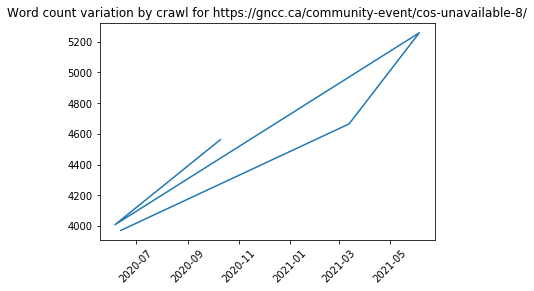

On internet archive:  https://web.archive.org/web/*/https://gncc.ca/community-event/cos-unavailable-8/


In [13]:

plt.plot(url_data['crawl_date'],url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for " + URL)
plt.show()
print("On internet archive: ", "https://web.archive.org/web/*/"+URL)